# Project 2 -  Modelling with ordinary differential equations

## By Mattis Sørensen, Tore Nygård and Mai-Helen Braathen

### Abstract:

### Introduction:



### Part 1

#### Execise 1.1 :

#### The purpose of trying to model the decline in population as −aN is because a is a positive constant related to the decline in population. The model assumes that as the population size increases, the growth rate decreases, and as the population size decreases, the growth rate increases. The purpose of modeling the decline in population as -a is to create a more realistic representation of population dynamics. The incorporation of the decline in population as -a in the model allows it to capture the idea that population growth is not unlimited but depends on the population's size relative to its carrying capacity.

#### Exercise 1.2 :

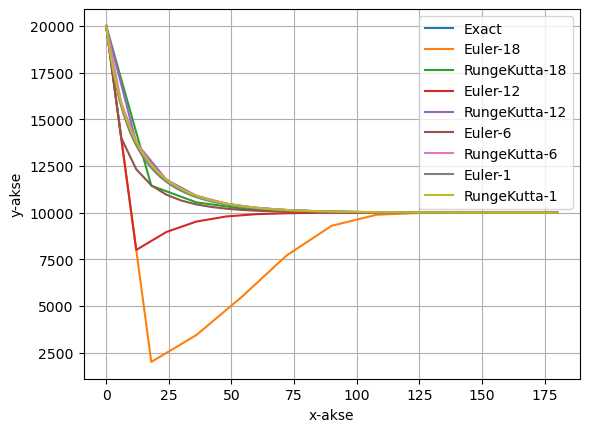

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import math


def main():
    x=0.0  # Start of integration
    xStop=15*12  # End of integration
    y=np.array([20000])  #Initial conditions
    h1=18  # Step size
    h2=12
    h3 = 6
    h4 = 1
    X1,Y1=integrate_euler(F,x,y,xStop,h1)
    X2,Y2=integrate_rungk4(F,x,y,xStop,h1)
    X3,Y3=integrate_euler(F,x,y,xStop,h2)
    X4,Y4=integrate_rungk4(F,x,y,xStop,h2)
    X5,Y5=integrate_euler(F,x,y,xStop,h3)
    X6,Y6=integrate_rungk4(F,x,y,xStop,h3)
    X7,Y7=integrate_euler(F,x,y,xStop,h4)
    X8,Y8=integrate_rungk4(F,x,y,xStop,h4)
    #YEx = 100*X2-5*X2*X2+990*(np.exp(-0.1*X2)-1)
    
    

    #Exact solution
    timestep = 1 #Use month as timeunit

    starttime = 0
    endtime = 12*15 #Number of months that shall be simulated

    k = 10000 #kg
    r = 0.6/12 #Per month

    N0 = 20000 #inital biomass in kg

    T1 = []
    YExact = []

    t =starttime
    y = N0

    YExact.append(y)
    T1.append(t)

    while (t<endtime):
        t = t+timestep
        
        y=N0*k/(N0+(k-N0)*math.exp(-r*t)) #exact solution
        T1.append(t)
        YExact.append(y)
        
    plt.plot(T1,YExact)
    plt.plot(X1,Y1[:,0],'-',X2,Y2[:,0],'-') #Euler and RungeKutta
    plt.plot(X3,Y3[:,0],'-',X4,Y4[:,0],'-') #Euler and RungeKutta
    plt.plot(X5,Y5[:,0],'-',X6,Y6[:,0],'-') #Euler and RungeKutta
    plt.plot(X7,Y7[:,0],'-',X8,Y8[:,0],'-') #Euler and RungeKutta
    plt.legend(['Exact','Euler-18','RungeKutta-18', 'Euler-12','RungeKutta-12', 'Euler-6','RungeKutta-6', 'Euler-1','RungeKutta-1'])
    plt.grid(True)
    plt.xlabel('x-akse')
    plt.ylabel('y-akse')
    plt.show()
    
#Eulers method
def integrate_euler(F,x,y,xStop,h):
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y+h*F(x,y)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)
#Rungekutta 4th order
def integrate_rungk4(F,x,y,xStop,h):
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y + run_kut4(F,x,y,h)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

#Rungekutta
def run_kut4(F,x,y,h):
  #  4th order Runge Kutta Method 
    K0=h*F(x,y)
    K1=h*F(x+0.5*h,y+0.5*K0)
    K2=h*F(x+0.5*h,y+0.5*K1)
    K3=h*F(x+h,y+K2)
    
    return (K0+2*K1+2*K2+K3)/6.0



def F(x,y):
    # User specified function that depends on the problem
    K = 10000
    r = 0.6/12
    F=np.zeros(1)
    F[0] = r*(1-y[0]/K)*y[0]
    return F
    
main()    

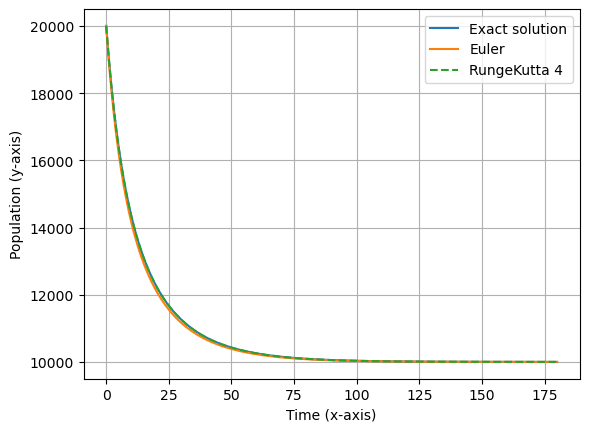

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    x = 0.0  # Start of integration
    xStop = 15*12 # End of integration
    y = np.array([20000])  # Initial conditions (population at t = 0)
    h1 = 1  # Step size for Euler's method
    h2 = 1 # Step size for Runge-Kutta 4th order method
    X1, Y1 = integrate_euler(logistic_growth, x, y, xStop, h1)
    X2, Y2 = integrate_rungk4(logistic_growth, x, y, xStop, h2)
    
    plt.plot(X1, Y1[:, 0], label='Euler')
    plt.plot(X2, Y2[:, 0], label='RungeKutta 4', linestyle='--')
    plt.grid(True)
    plt.xlabel('Time (x-axis)')
    plt.ylabel('Population (y-axis)')
    plt.legend()
    plt.show()


timestep = 1 #Use month as timeunit

starttime = 0
endtime = 12*15 #Number of months that shall be simulated

k = 10000 #kg
r = 0.6/12 #Per month

N0 = 20000 #inital biomass in kg

T1 = []
YExact = []

t =starttime
y = N0

YExact.append(y)
T1.append(t)

while (t<endtime):
    t = t+timestep
    
    y=N0*k/(N0+(k-N0)*math.exp(-r*t)) #exact solution
    T1.append(t)
    YExact.append(y)
    
plt.plot(T1,YExact, label='Exact solution')

def integrate_euler(F, x, y, xStop, h):
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    
    while x < xStop:
        h = min(h, xStop - x)
        y = y + h * F(x, y)
        x = x + h
        X.append(x)
        Y.append(y)
    
    return np.array(X), np.array(Y)

def integrate_rungk4(F, x, y, xStop, h):
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    
    while x < xStop:
        h = min(h, xStop - x)
        y = y + run_kut4(F, x, y, h)
        x = x + h
        X.append(x)
        Y.append(y)
    
    return np.array(X), np.array(Y)

def run_kut4(F, x, y, h):
    K0 = h * F(x, y)
    K1 = h * F(x + 0.5 * h, y + 0.5 * K0)
    K2 = h * F(x + 0.5 * h, y + 0.5 * K1)
    K3 = h * F(x + h, y + K2)
    
    return (K0 + 2 * K1 + 2 * K2 + K3) / 6.0

def logistic_growth(x, y):
    # Logistic growth differential equation
    r = 0.6/12  # Growth rate (adjust as needed)
    K = 10000  # Carrying capacity (adjust as needed)
    dydx = r * y * (1 - y / K)
    return dydx

main()


In [2]:
# Eulers method: - EKSEMPEL FRA BOKA, MÅ GJØRE OM MED RIKTIGE VERDIER!!! 

def main():
    x=0.0  # Start of integration
    xStop=2.0  # End of integration
    y=np.array([0.0,1.0])  #Initial conditions
    h=0.05  # Step size
    X,Y=integrate(F,x,y,xStop,h)
  #  print(Y)
    yExact = 100.0*X-5.0*X**2+990.0*(np.exp(-0.1*X)-1.0)
    plt.plot(X,Y[:,0],'o',X,yExact,'-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend(('Numerical','Exact'))
    plt.show()
    
    
def integrate(F,x,y,xStop,h):
    
    # a general function that applies Eulers method. It finds
    # the solution from start to stop and returns the results
    # in arrays.
    
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y+h*F(x,y)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

def F(x,y):
    # User specified function that depends on the problem
    F=np.zeros(2)
    F[0]=y[1]
    F[1]=-0.1*y[1]-x
    return F
    

main()    





IndentationError: expected an indented block (2591021245.py, line 24)

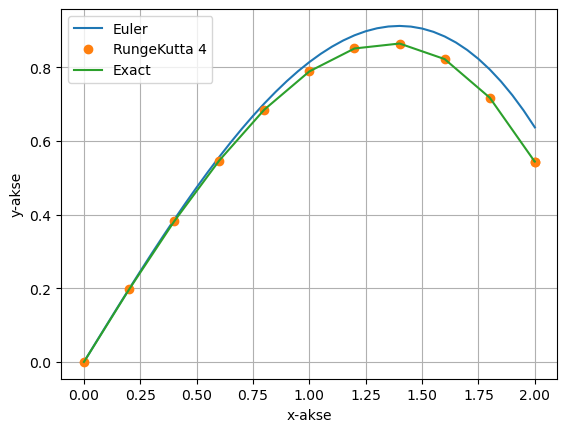

In [10]:
# Fourth order runge kutta method: - EKSEMPEL FRA BOKA MÅ GJØRE OM MED RIKTIGE VERDIER!!!

def main():
    x=0.0  # Start of integration
    xStop=2.0  # End of integration
    y=np.array([0.0,1.0])  #Initial conditions
    h1=0.05  # Step size
    h2=0.2
    X1,Y1=integrate_euler(F,x,y,xStop,h1)
    X2,Y2=integrate_rungk4(F,x,y,xStop,h2)
    YEx = 100*X2-5*X2*X2+990*(np.exp(-0.1*X2)-1)
    
    plt.plot(X1,Y1[:,0],X2,Y2[:,0],'o',X2,YEx)
    plt.legend(['Euler','RungeKutta 4','Exact'])
    plt.grid(True)
    plt.xlabel('x-akse')
    plt.ylabel('y-akse')
    plt.show()
    
    
def integrate_euler(F,x,y,xStop,h):
    
    # a general function that applies Eulers method
    
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y+h*F(x,y)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

def integrate_rungk4(F,x,y,xStop,h):
    
    # a general function that applies rungekutta
    
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y + run_kut4(F,x,y,h)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)


def run_kut4(F,x,y,h):
  #  4th order Runge Kutta Method 
    K0=h*F(x,y)
    K1=h*F(x+0.5*h,y+0.5*K0)
    K2=h*F(x+0.5*h,y+0.5*K1)
    K3=h*F(x+h,y+K2)
    
    return (K0+2*K1+2*K2+K3)/6.0



def F(x,y):
    # User specified function that depends on the problem
    F=np.zeros(2)
    F[0]=y[1]
    F[1]=-0.1*y[1]-x
    return F
    

main()    

### Part 2 – Modelling and Control of the Water Level in a Tank